# 数据导入

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
df = pd.read_csv('watermelon.csv')
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,否


# 数据预处理

In [2]:
# 对属性进行编码
encoder=preprocessing.LabelEncoder()
for i in range(1,df.shape[1]):
    df[df.columns[i]]=encoder.fit_transform(df[df.columns[i]])
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,2,2,1,1,0,0,1
1,2,0,2,0,1,0,0,1
2,3,0,2,1,1,0,0,1
3,4,2,2,0,1,0,0,1
4,5,1,2,1,1,0,0,1
5,6,2,1,1,1,2,1,1
6,7,0,1,1,2,2,1,1
7,8,0,1,1,1,2,0,1
8,9,0,1,0,2,2,0,0
9,10,2,0,2,1,1,1,0


# 划分训练集测试集合

In [53]:
# 按照 8:2 划分训练集测试集
X = df[["色泽","根蒂","敲声","纹理","脐部","触感"]]
y = df[["好瓜"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

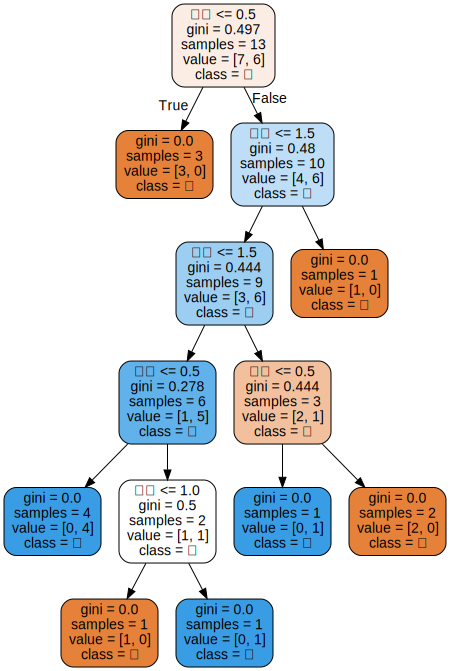

In [54]:
# 定义模型
cart = tree.DecisionTreeClassifier(criterion = "gini")
# 进行训练
cart.fit(X_train,y_train)
# 打印决策树（使用graphviz进行打印）
import graphviz
dot_data = tree.export_graphviz(cart
                                ,feature_names = ["色泽","根蒂","敲声","纹理","脐部","触感"]
                                ,class_names = ["是","否"]
                                ,filled = True
                                ,rounded = True
                               )
graph = graphviz.Source(dot_data)
graph

# 精度评价

accuracy is: 0.75
precision is: 0.6666666666666666
recall is: 1.0
precision-recall is: (array([0.66666667, 1.        ]), array([1., 0.]), array([1]))
F1 is: 0.8


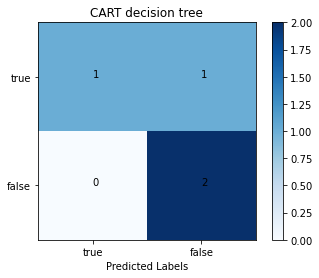

In [55]:
# 预测精度评价
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = cart.predict(X_test)
# 准确率accuracy
print("accuracy is: {}".format(metrics.accuracy_score(y_test,y_pred)))
# 精确度precision
print("precision is: {}".format(metrics.precision_score(y_test,y_pred)))
# 召回率recall
print("recall is: {}".format(metrics.recall_score(y_test,y_pred)))
# 精确度-召回率平衡曲线
print("precision-recall is: {}".format(metrics.precision_recall_curve(y_test,y_pred)))
# F1
print("F1 is: {}".format(metrics.f1_score(y_test,y_pred)))
# 混淆矩阵
def show_metrics(y_tret, y_pred = y_pred):
    # 生成混淆矩阵
    metr = metrics.confusion_matrix(y_test,y_pred)
    # 画图，设定颜色
    plt.imshow(metr, cmap = plt.cm.Blues)
    # 设定图的横纵种类。
    plt.xticks(range(len(metr)),["true", "false"])
    plt.yticks(range(len(metr)),["true", "false"])
    plt.colorbar()
    # 设定图的横纵含义以及标题
    plt.xlabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.title("CART decision tree")
    # 填写数据
    for i in range(len(metr)):
        for j in range(len(metr)):
            plt.text(i, j, metr[j][i])
    plt.show()
show_metrics(y_test)

# 基尼指数计算

In [87]:
import numpy as np
def gini(nums):
    """
    输入：包含类别取值的列表
    输出：基尼指数值
    """
    # 获取列表类别的概率分布
    probs = [nums.count(i)/len(nums) for i in set(nums)]
    # 计算基尼指数
    gini = sum([p*(1-p) for p in probs])
    return gini
def gini_DA(subset1, subset2):
    # 计算基尼指数
    gini_DA = len(subset1)/len(df)*gini(subset1["好瓜"].tolist()) + \
              len(subset2)/len(df)*gini(subset2["好瓜"].tolist())
    return gini_DA

In [95]:
ddf = pd.read_csv('watermelon.csv')
print(ddf)
# 色泽
## 青绿, -青绿
subset1 = ddf[ddf["色泽"] == "青绿"]
subset2 = ddf[ddf["色泽"] != "青绿"]
print("青绿: ", gini_DA(subset1, subset2))
## 乌黑, -乌黑
subset1 = ddf[ddf["色泽"] == "乌黑"]
subset2 = ddf[ddf["色泽"] != "乌黑"]
print("乌黑: ", gini_DA(subset1, subset2))
## 浅白, -浅白
subset1 = ddf[ddf["色泽"] == "浅白"]
subset2 = ddf[ddf["色泽"] != "浅白"]
print("浅白: ", gini_DA(subset1, subset2))


# 根蒂
## 蜷缩, -蜷缩
subset1 = ddf[ddf["根蒂"] == "蜷缩"]
subset2 = ddf[ddf["根蒂"] != "蜷缩"]
print("蜷缩: ", gini_DA(subset1, subset2))
## 稍蜷, -稍蜷
subset1 = ddf[ddf["根蒂"] == "稍蜷"]
subset2 = ddf[ddf["根蒂"] != "稍蜷"]
print("稍蜷: ", gini_DA(subset1, subset2))
## 硬挺, -硬挺
subset1 = ddf[ddf["根蒂"] == "硬挺"]
subset2 = ddf[ddf["根蒂"] != "硬挺"]
print("硬挺: ", gini_DA(subset1, subset2))


# 敲声
## 浊响
subset1 = ddf[ddf["敲声"] == "浊响"]
subset2 = ddf[ddf["敲声"] != "浊响"]
print("浊响: ", gini_DA(subset1, subset2))
## 沉闷
subset1 = ddf[ddf["敲声"] == "沉闷"]
subset2 = ddf[ddf["敲声"] != "沉闷"]
print("沉闷: ", gini_DA(subset1, subset2))
## 清脆
subset1 = ddf[ddf["敲声"] == "清脆"]
subset2 = ddf[ddf["敲声"] != "清脆"]
print("清脆: ", gini_DA(subset1, subset2))


# 纹理
## 清晰
subset1 = ddf[ddf["纹理"] == "清晰"]
subset2 = ddf[ddf["纹理"] != "清晰"]
print("清晰: ", gini_DA(subset1, subset2))
## 稍糊
subset1 = ddf[ddf["纹理"] == "稍糊"]
subset2 = ddf[ddf["纹理"] != "稍糊"]
print("稍糊: ", gini_DA(subset1, subset2))
## 模糊
subset1 = ddf[ddf["纹理"] == "模糊"]
subset2 = ddf[ddf["纹理"] != "模糊"]
print("模糊: ", gini_DA(subset1, subset2))


# 脐部
## 凹陷
subset1 = ddf[ddf["脐部"] == "凹陷"]
subset2 = ddf[ddf["脐部"] != "凹陷"]
print("凹陷: ", gini_DA(subset1, subset2))
## 稍凹
subset1 = ddf[ddf["脐部"] == "稍凹"]
subset2 = ddf[ddf["脐部"] != "稍凹"]
print("稍凹: ", gini_DA(subset1, subset2))
## 平坦
subset1 = ddf[ddf["脐部"] == "平坦"]
subset2 = ddf[ddf["脐部"] != "平坦"]
print("平坦: ", gini_DA(subset1, subset2))

# 触感
## 硬滑
subset1 = ddf[ddf["触感"] == "硬滑"]
subset2 = ddf[ddf["触感"] != "硬滑"]
print("硬滑: ", gini_DA(subset1, subset2))
## 软粘
subset1 = ddf[ddf["触感"] == "软粘"]
subset2 = ddf[ddf["触感"] != "软粘"]
print("软粘: ", gini_DA(subset1, subset2))

    编号  色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0    1  青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1    2  乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2    3  乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
3    4  青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4    5  浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
5    6  青绿  稍蜷  浊响  清晰  稍凹  软粘  是
6    7  乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
7    8  乌黑  稍蜷  浊响  清晰  稍凹  硬滑  是
8    9  乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
9   10  青绿  硬挺  清脆  清晰  平坦  软粘  否
10  11  浅白  硬挺  清脆  模糊  平坦  硬滑  否
11  12  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  13  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  否
13  14  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  否
14  15  乌黑  稍蜷  浊响  清晰  稍凹  软粘  否
15  16  浅白  蜷缩  浊响  模糊  平坦  硬滑  否
16  17  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  否
青绿:  0.49732620320855614
乌黑:  0.45632798573975053
浅白:  0.4372549019607843
蜷缩:  0.4558823529411765
稍蜷:  0.4957983193277311
硬挺:  0.4392156862745098
浊响:  0.45042016806722684
沉闷:  0.49411764705882355
清脆:  0.4392156862745098
清晰:  0.28594771241830064
稍糊:  0.4372549019607843
模糊:  0.4033613445378151
凹陷:  0.4151260504201681
稍凹:  0.49732620320855614
平坦:  0.3619909502262443
硬滑:  0.494117647058823